# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [2]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [3]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [4]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [5]:
x_vals.shape

(200,)

In [6]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


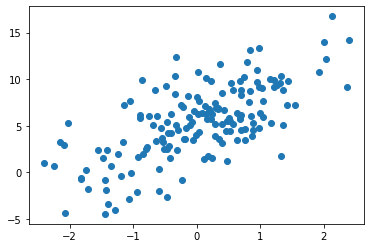

In [7]:
plt.scatter(x_train, y_train)

In [8]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [9]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [10]:
criterion = torch.nn.MSELoss() 

In [11]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 42.692405700683594
h: 2 | epoch: 50, loss: 37.56977844238281
h: 2 | epoch: 100, loss: 33.569862365722656
h: 3 | epoch: 0, loss: 47.175601959228516
h: 3 | epoch: 50, loss: 37.92622756958008
h: 3 | epoch: 100, loss: 27.14520835876465
h: 4 | epoch: 0, loss: 43.05925750732422
h: 4 | epoch: 50, loss: 32.77583694458008
h: 4 | epoch: 100, loss: 21.795927047729492
h: 5 | epoch: 0, loss: 39.309425354003906
h: 5 | epoch: 50, loss: 27.603479385375977
h: 5 | epoch: 100, loss: 16.787166595458984
h: 6 | epoch: 0, loss: 46.93109893798828
h: 6 | epoch: 50, loss: 35.50210189819336
h: 6 | epoch: 100, loss: 25.832366943359375
h: 7 | epoch: 0, loss: 44.62360763549805
h: 7 | epoch: 50, loss: 37.476104736328125
h: 7 | epoch: 100, loss: 32.044132232666016
h: 8 | epoch: 0, loss: 54.7021598815918
h: 8 | epoch: 50, loss: 30.691415786743164
h: 8 | epoch: 100, loss: 16.555774688720703
h: 9 | epoch: 0, loss: 44.711265563964844
h: 9 | epoch: 50, loss: 29.72262191772461
h: 9 | epoch: 100, loss

h: 65 | epoch: 100, loss: 9.84877872467041
h: 66 | epoch: 0, loss: 43.08460998535156
h: 66 | epoch: 50, loss: 10.921083450317383
h: 66 | epoch: 100, loss: 9.077835083007812
h: 67 | epoch: 0, loss: 39.3473014831543
h: 67 | epoch: 50, loss: 12.135701179504395
h: 67 | epoch: 100, loss: 9.38120174407959
h: 68 | epoch: 0, loss: 45.60858917236328
h: 68 | epoch: 50, loss: 11.141528129577637
h: 68 | epoch: 100, loss: 9.220061302185059
h: 69 | epoch: 0, loss: 51.569847106933594
h: 69 | epoch: 50, loss: 12.544759750366211
h: 69 | epoch: 100, loss: 9.083520889282227
h: 70 | epoch: 0, loss: 37.625144958496094
h: 70 | epoch: 50, loss: 10.363115310668945
h: 70 | epoch: 100, loss: 8.899171829223633
h: 71 | epoch: 0, loss: 49.20394515991211
h: 71 | epoch: 50, loss: 11.180685043334961
h: 71 | epoch: 100, loss: 9.004403114318848
h: 72 | epoch: 0, loss: 50.1841926574707
h: 72 | epoch: 50, loss: 10.242948532104492
h: 72 | epoch: 100, loss: 8.776250839233398
h: 73 | epoch: 0, loss: 43.54648971557617
h: 73 

In [12]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.902522 ]
 [ 2.8270493]
 [ 3.4047832]
 [ 5.4031477]
 [ 7.8822446]
 [ 2.032013 ]
 [ 9.082644 ]
 [ 4.3535137]
 [ 5.9129295]
 [ 6.3615236]
 [ 2.9993281]
 [ 2.8929853]
 [ 7.38951  ]
 [ 3.3161597]
 [ 4.103616 ]
 [ 2.7963061]
 [ 7.884774 ]
 [ 9.498088 ]
 [ 6.662055 ]
 [ 3.3949676]
 [ 2.2277637]
 [ 1.9760557]
 [ 5.09418  ]
 [ 3.0466743]
 [ 2.1339574]
 [ 3.4074636]
 [ 4.0615425]
 [ 8.094581 ]
 [ 4.538439 ]
 [ 6.697992 ]
 [ 2.1800184]
 [ 5.7287717]
 [ 5.086544 ]
 [ 8.72812  ]
 [ 2.6718416]
 [ 2.7185884]
 [ 1.868836 ]
 [ 8.5554285]
 [ 7.233649 ]
 [ 6.2543545]
 [ 6.9037743]
 [ 6.334093 ]
 [ 5.370906 ]
 [ 6.1223783]
 [ 6.8184958]
 [ 7.4657216]
 [ 1.8023708]
 [ 7.069658 ]
 [ 8.052901 ]
 [ 3.4454126]
 [ 5.4060874]
 [ 2.7302127]
 [ 1.8406316]
 [ 5.94576  ]
 [11.661948 ]
 [ 2.684857 ]
 [ 5.817814 ]
 [ 3.987906 ]
 [ 9.239342 ]
 [ 6.9093385]
 [ 1.9752831]
 [ 4.953722 ]
 [ 7.387208 ]
 [ 3.7441235]
 [ 5.909482 ]
 [ 4.239979 ]
 [ 4.7534313]
 [ 3.570982 ]
 [ 2.4336257]
 [ 8.458635 ]
 [ 3.5656905]
 [ 7.3

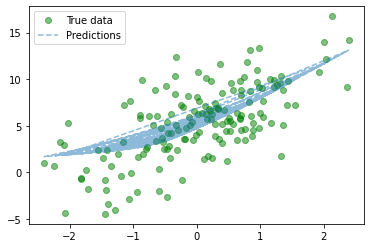

In [13]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

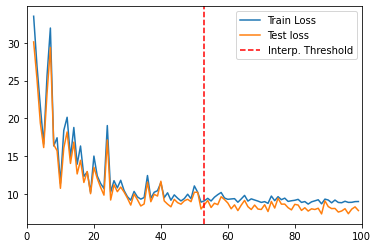

In [21]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

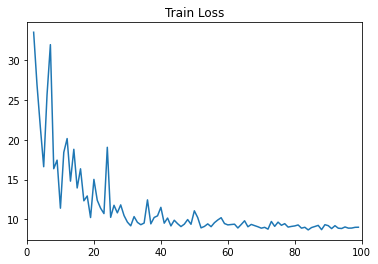

In [15]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

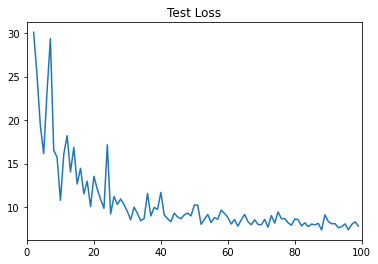

In [16]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)